# Problemática:
Segmentar a los clientes de la empresa en diferentes grupos con el objetivo de desarrollar una campaña de marketing  acorde para cada grupo de clientes.

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

## Imports

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Link al dataSet: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [24]:
# Carga del dataSet
file_path = '/content/data/Marketing_data.csv'

creditcard_df = pd.read_csv(file_path)
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [25]:
# Informacion del dataSet
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [26]:
# Resumen estadistico del dataSet
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Análisis exploratorio de datos

### Datos faltantes

In [27]:
# Datos nulos
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

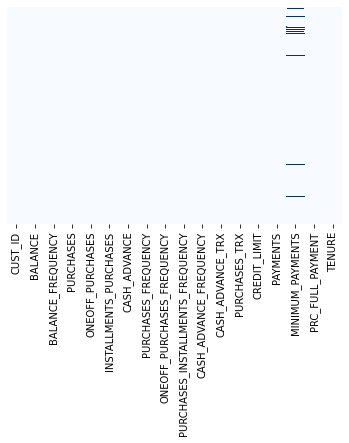

In [28]:
# Visualizacion
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

In [29]:
# Completar los datos faltantes del campo 'MINIMUM_PAYMENT' con el promedio del mismo campo
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [30]:
# Completar los datos faltantes del campo 'CREDIT_LIMIT' con el promedio del mismo campo
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [31]:
# Comprobación de los datos faltantes
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

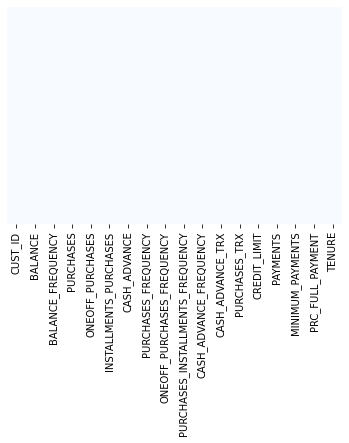

In [32]:
# Visualizacion
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

### Datos duplicados

In [33]:
# Cantidad de datos duplicados
creditcard_df.duplicated().sum()

0

### Datos irrelevantes

In [34]:
# Se eliminara la columna:'CUST_ID'
creditcard_df.drop("CUST_ID", axis = 1, inplace=True)
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Visualizacion

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc801fd4c40>,
      dtype=object)

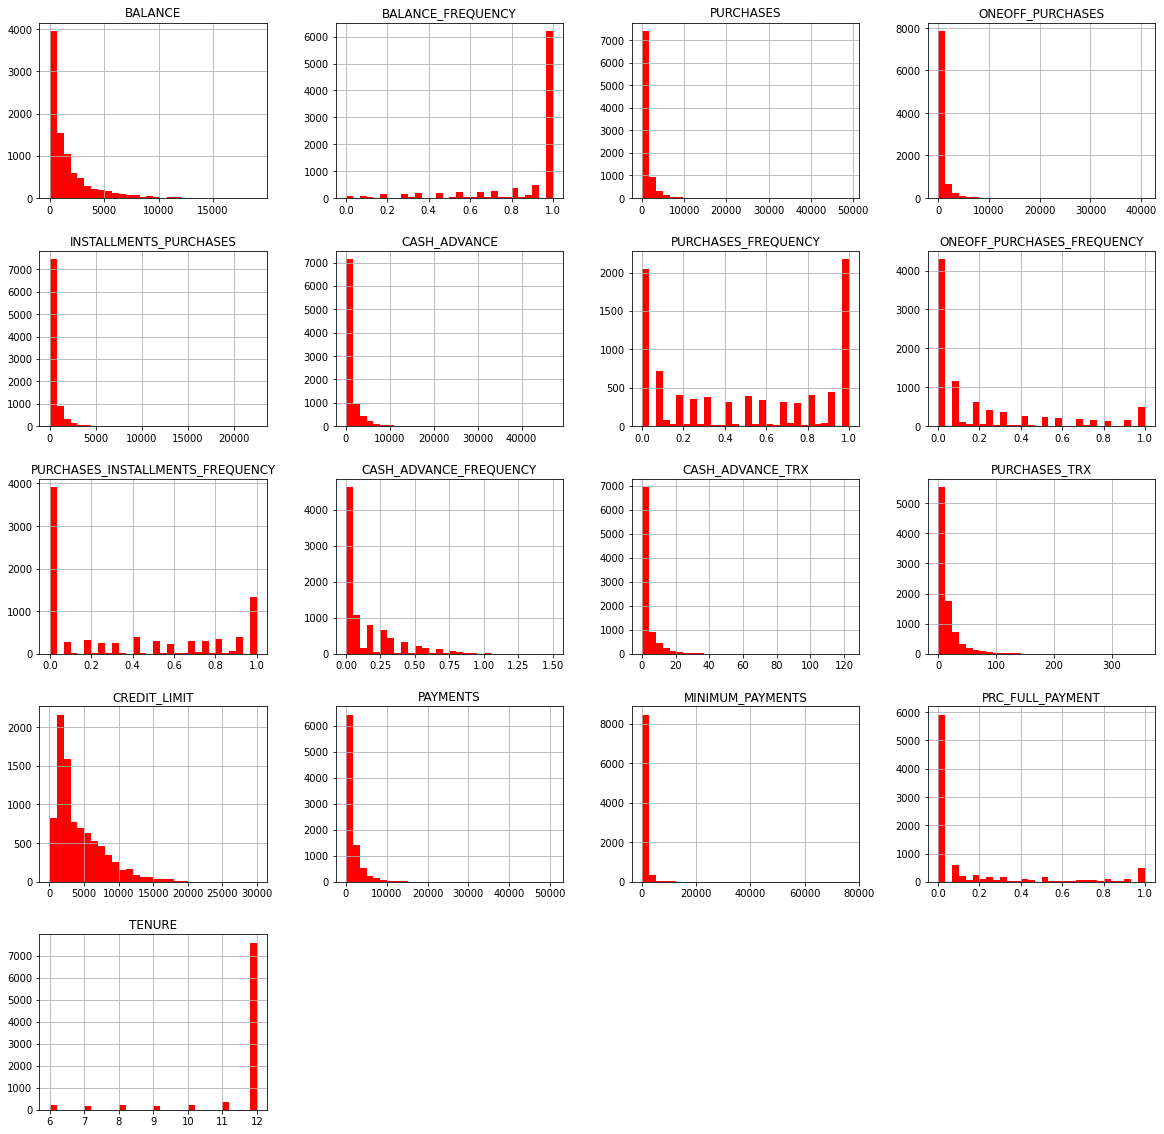

In [35]:
# Histograma
creditcard_df.hist(bins=30, figsize=(20,20), color='r')

## Análisis de datos

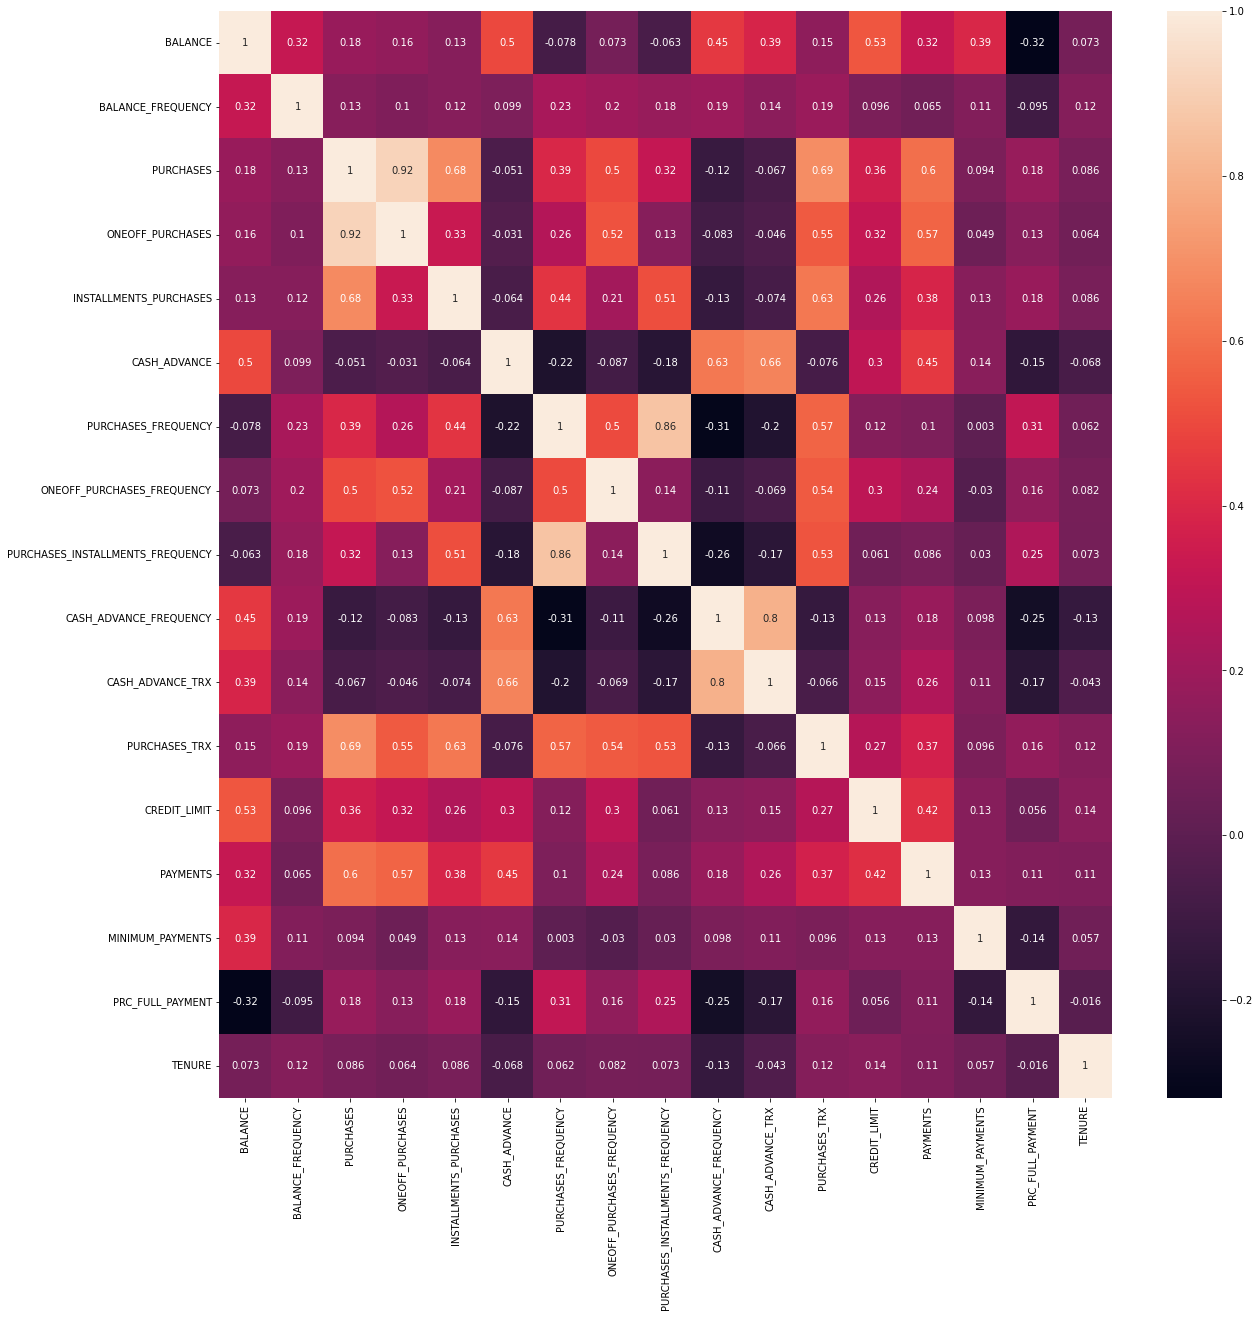

In [36]:
# Correlaciones
correlacion = creditcard_df.corr()
f, ax = plt.subplots(figsize=(20,20))

sns.heatmap(correlacion, annot=True)

Observaciones preliminares:

* 'PURCHASES' tienen una alta correlación con one-off purchases, 'installment purchases, purchase transactions, credit limit y payments. 
* Correlación positiva muy elevada entre 'PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY'

## Modelado del codo: Estimar el numero optimo de cluster

In [37]:
# Escalado del dataSet
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [38]:
# Dimencion del dataSet
creditcard_df_scaled.shape

(8950, 17)

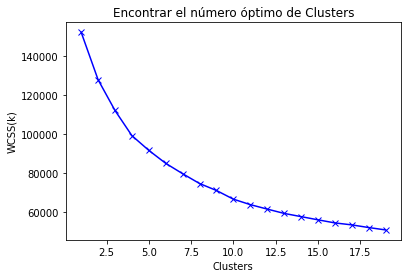

In [39]:
# Metodo del codo
from sklearn.cluster import KMeans

scores_1 = []
range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_) #WCSS


plt.plot(range_values, scores_1, 'bx-')
plt.title("Encontrar el número óptimo de Clusters")
plt.xlabel("Clusters")
plt.ylabel("WCSS(k)")
plt.show()

Observaciones preliminares:

* Podemos ver que en 4 clusters es donde se forma el codo de la curva.
* Los valores no se reducen a una forma lineal hasta el 8º cluster. 
* Por ende, el numero obtimo de clusters se encuentra entre el 4 y el 8

## Modelado: K-MEANS

In [40]:
# Ajuste y modelado
from sklearn.cluster import KMeans

kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)

# Obteniendo las etiquetas
labels = kmeans.labels_

In [41]:
# Dimencion de los baricentros
kmeans.cluster_centers_.shape

(8, 17)

In [42]:
# Creacion del dataSet de los baricentros
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.700985,-2.139684,-0.310444,-0.234891,-0.302389,-0.320252,-0.554901,-0.441624,-0.440296,-0.521144,-0.376401,-0.419327,-0.173624,-0.192212,-0.256604,0.284685,0.199250
1,-0.124989,0.401068,0.540265,0.667866,0.050276,-0.328192,0.981326,1.894568,0.181072,-0.408443,-0.325913,0.620328,0.439526,0.149078,-0.155643,0.435736,0.268346
2,1.683882,0.397258,-0.222676,-0.159921,-0.232780,2.002909,-0.481372,-0.213928,-0.419545,1.917719,1.921090,-0.272290,1.018895,0.797997,0.552019,-0.396055,0.070323
3,1.039759,0.463618,2.525761,1.834818,2.601281,-0.134424,1.161850,1.565375,1.266677,-0.273197,-0.135675,3.137294,1.303810,1.477503,0.561811,0.261235,0.337394
4,0.009142,0.403904,-0.356259,-0.241331,-0.398893,-0.097405,-0.848829,-0.393160,-0.751399,0.096839,-0.032631,-0.480554,-0.305299,-0.251038,-0.012657,-0.455308,0.274939
5,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
6,-0.334991,-0.343956,-0.287359,-0.214116,-0.285729,0.067452,-0.198816,-0.285163,-0.220763,0.308521,0.000464,-0.385827,-0.557890,-0.391199,-0.209314,0.010799,-3.193185
7,-0.363102,0.332756,-0.034706,-0.244394,0.366743,-0.363849,0.997675,-0.388487,1.212204,-0.475214,-0.361625,0.192594,-0.263217,-0.215548,-0.029656,0.321002,0.258681


In [43]:
# Para entender mejor los valores, se aplica la transformación inversa.
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,105.433377,0.370399,339.937418,202.567072,137.620810,307.287373,0.267642,0.070713,0.189453,0.030858,0.680169,4.286920,3862.733708,1176.708873,266.202271,0.236980,11.783966
1,1304.320635,0.972280,2157.489435,1700.958217,456.531218,290.638151,0.884204,0.767644,0.436400,0.053411,1.024713,30.128861,6093.625130,2164.709752,501.486369,0.281160,11.876434
2,5069.332463,0.971378,527.453520,327.001691,200.568023,5179.065638,0.297153,0.138639,0.197700,0.518899,16.358857,7.941714,8201.605195,4043.267773,2150.662926,0.037875,11.611429
3,3728.646137,0.987098,6399.532663,3637.858669,2763.373711,696.978227,0.956657,0.669439,0.867847,0.080475,2.322946,92.691218,9238.243626,6010.369200,2173.483036,0.230121,11.968839
4,1583.502705,0.972952,242.051322,191.877709,50.353308,774.608345,0.149674,0.085170,0.065812,0.154523,3.026144,2.765069,3383.648027,1006.413862,834.710935,0.020545,11.885258
5,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
6,867.218841,0.795791,389.256922,237.048501,152.686890,1120.321459,0.410556,0.117388,0.276701,0.196882,3.251994,5.119617,2464.616347,600.660161,376.410084,0.156873,7.244019
7,808.708292,0.956098,929.055410,186.793195,742.708855,215.863334,0.890766,0.086564,0.846198,0.040049,0.781000,19.497000,3536.760101,1109.153589,795.095339,0.247602,11.863500


In [44]:
# Dimencion de las etiquetas
labels.shape

(8950,)

In [45]:
# Rango de las etiquetas
print(f'Las etiquetas se encunetran entre {labels.min()} y {labels.max()}')

Las etiquetas se encunetran entre 0 y 7


In [46]:
# Prediccion de cluster
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([1, 4, 3, ..., 7, 7, 7], dtype=int32)

In [47]:
# Concatenar las etiquetas de los clusters con el dataset riginal 
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


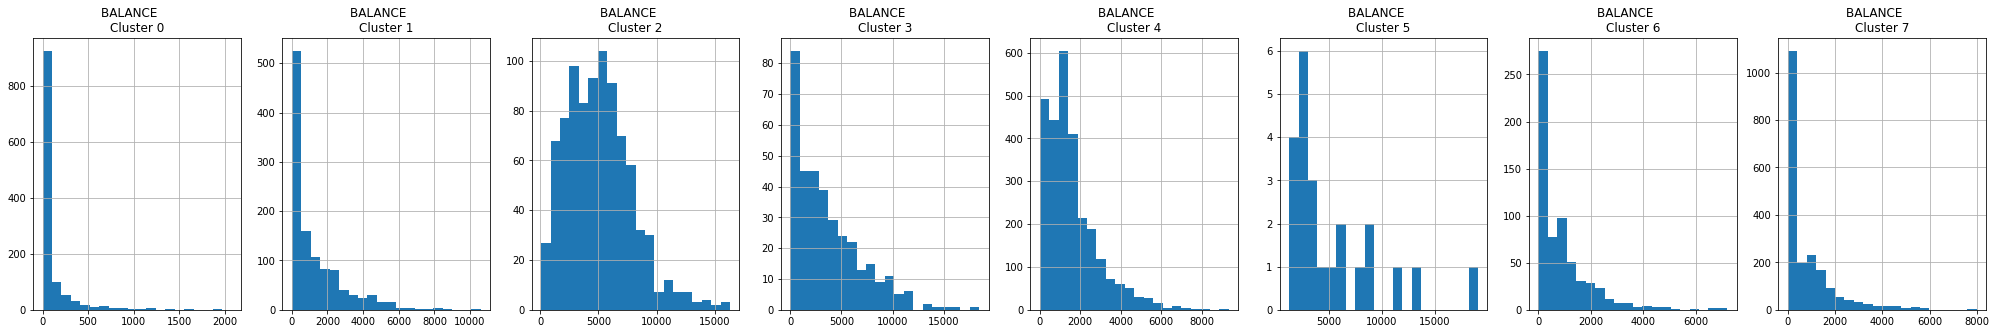

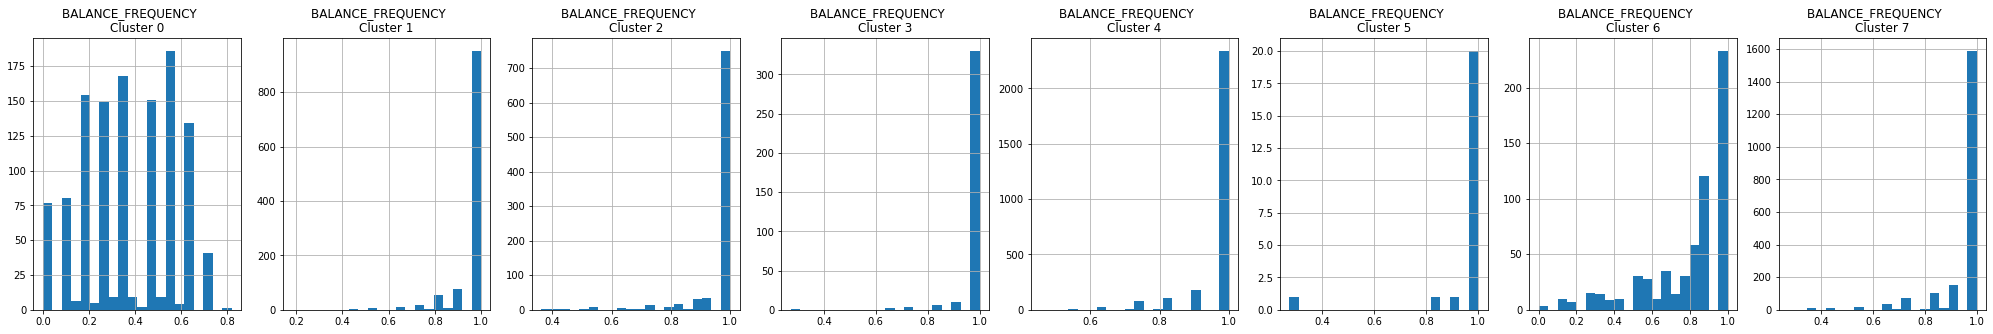

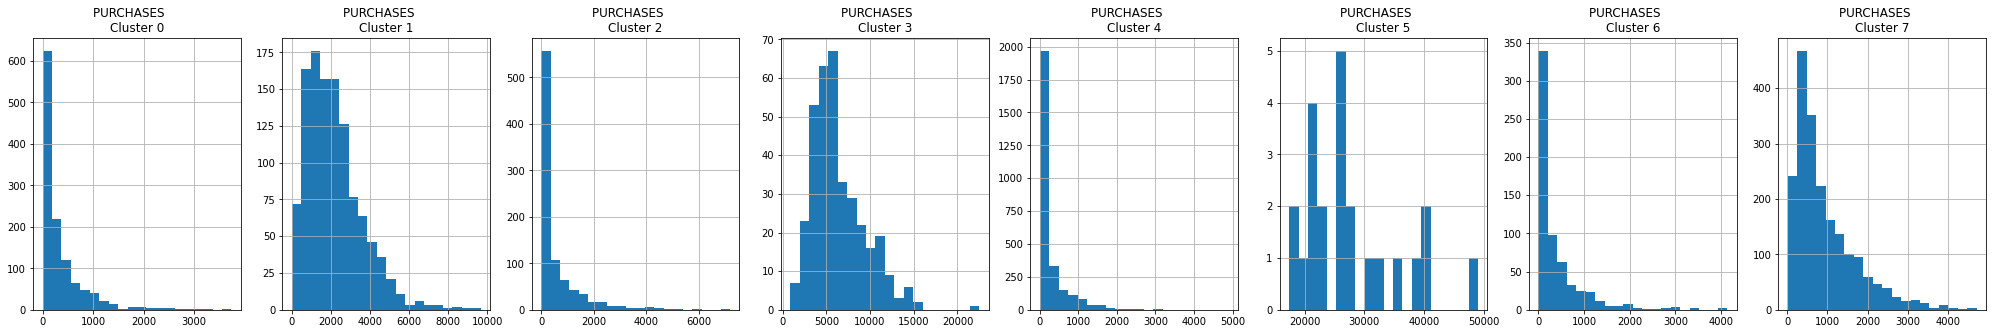

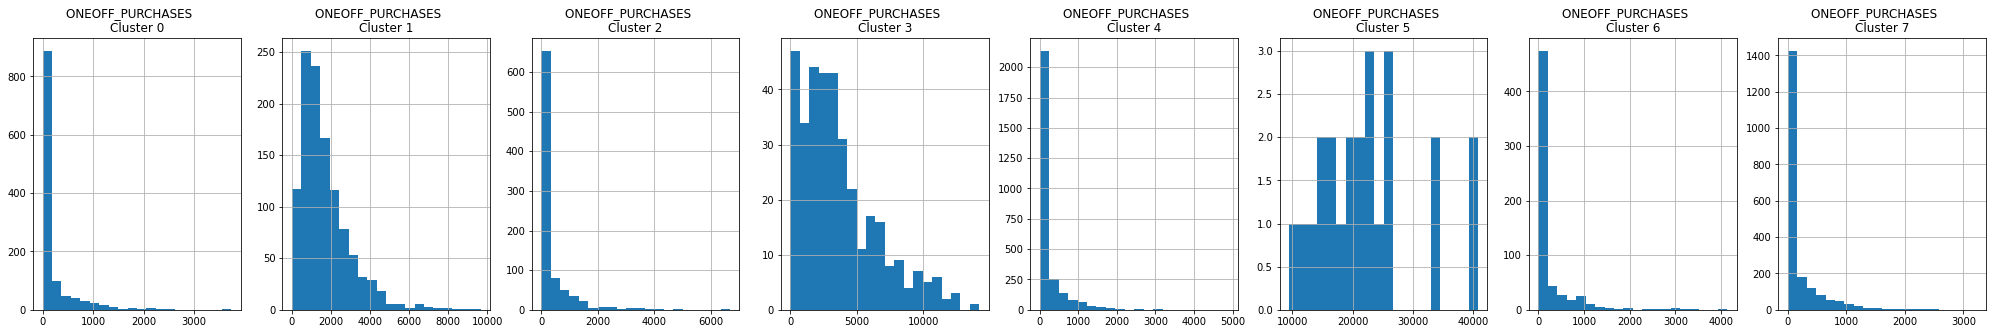

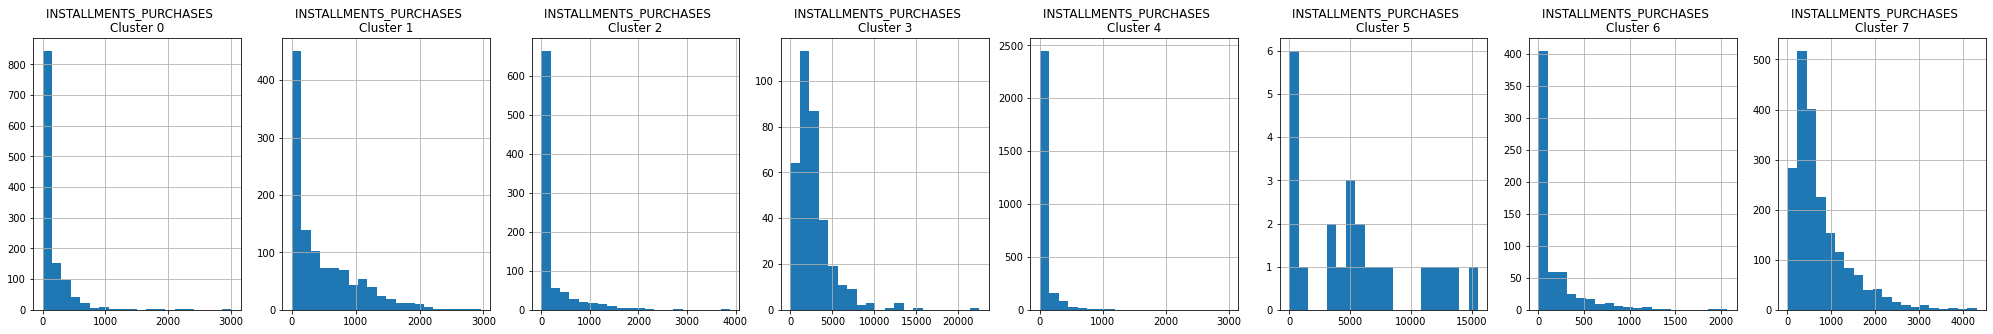

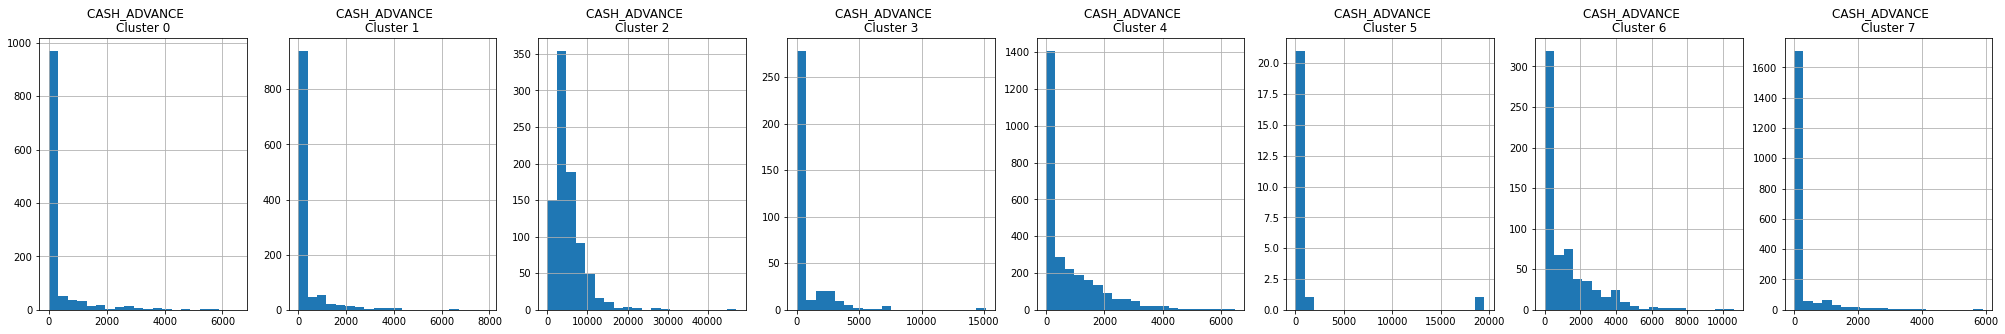

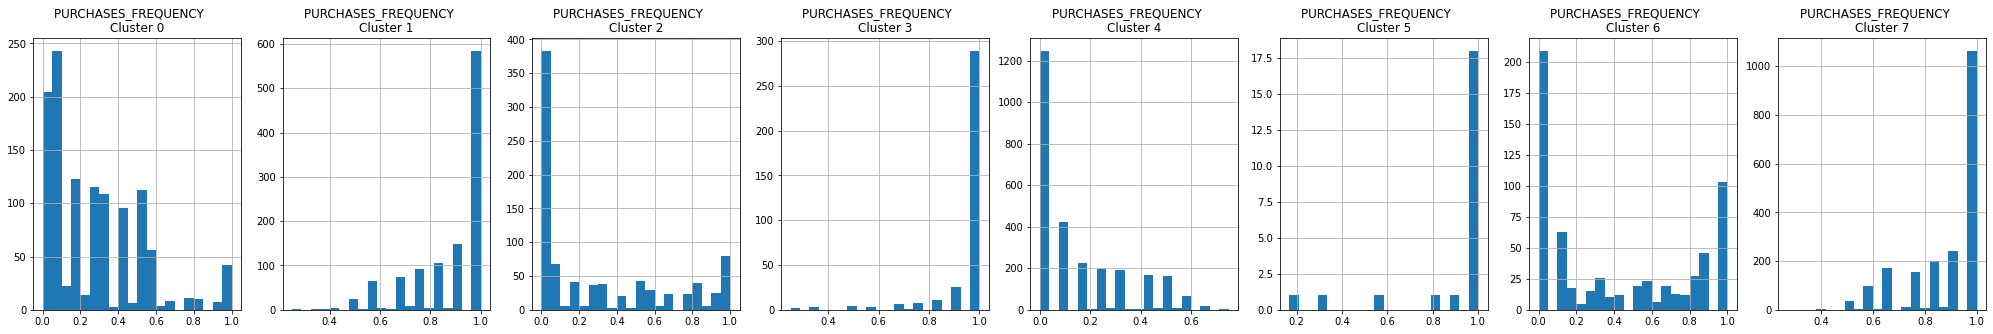

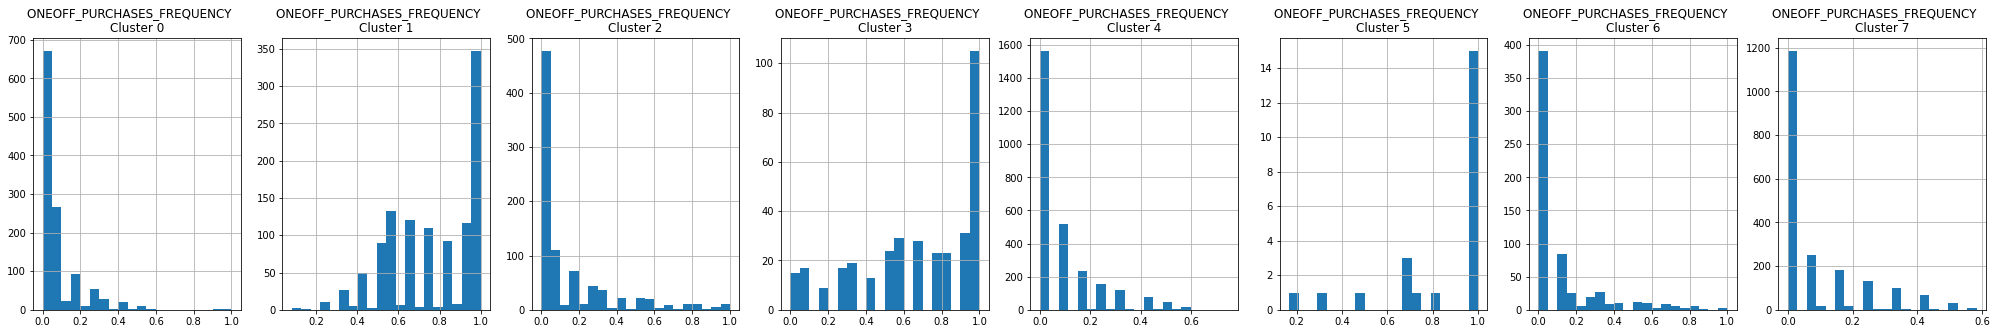

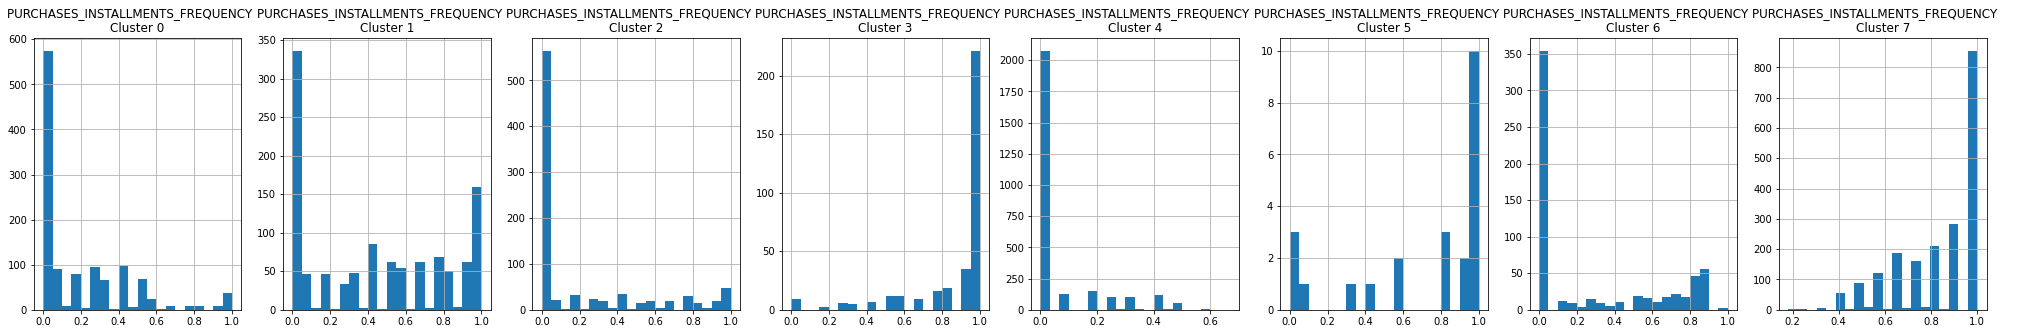

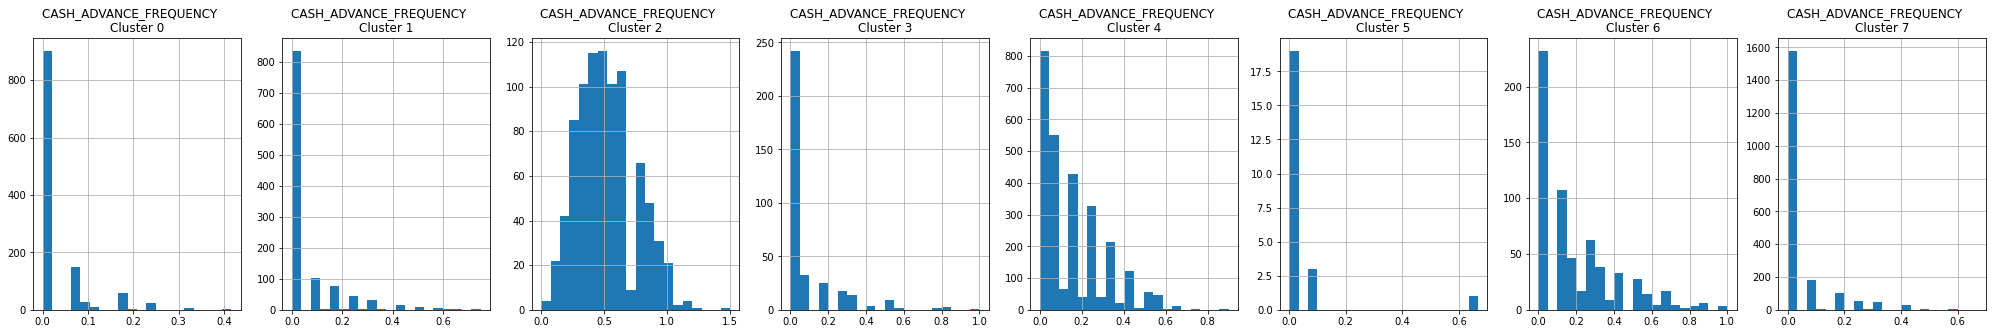

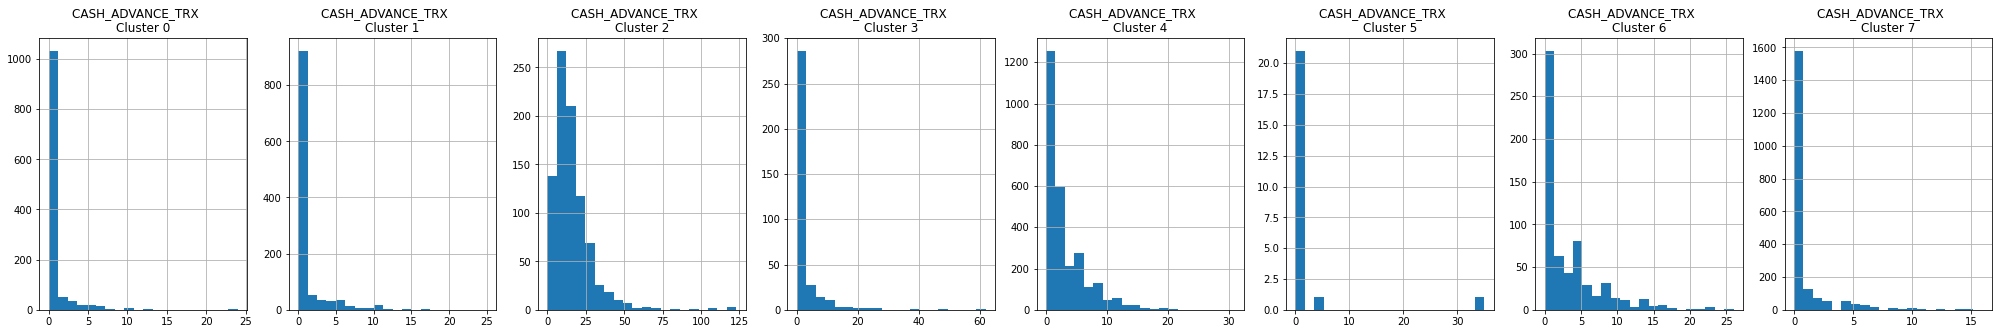

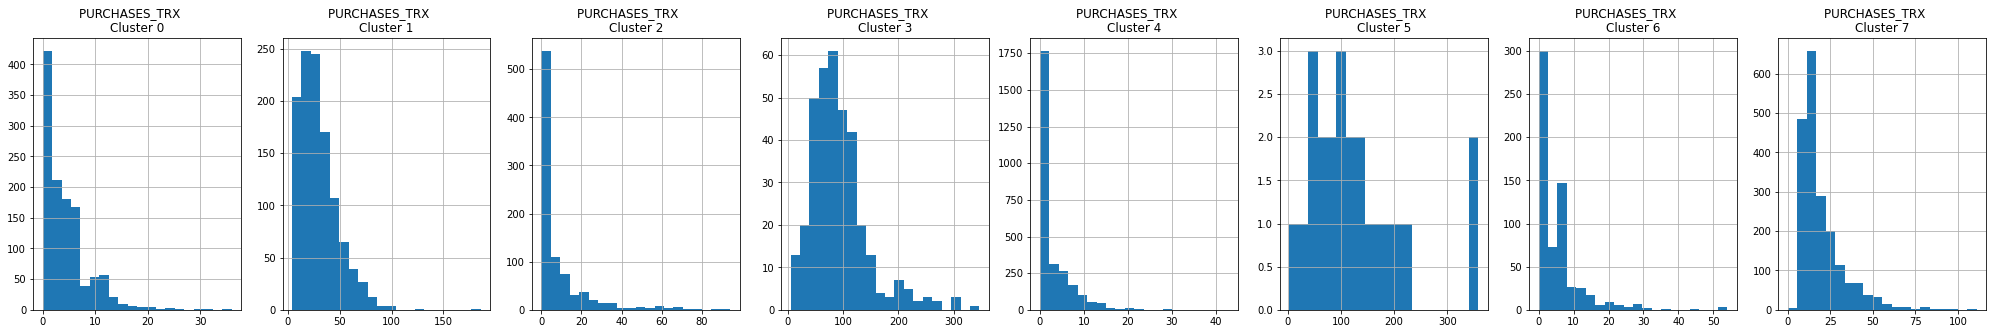

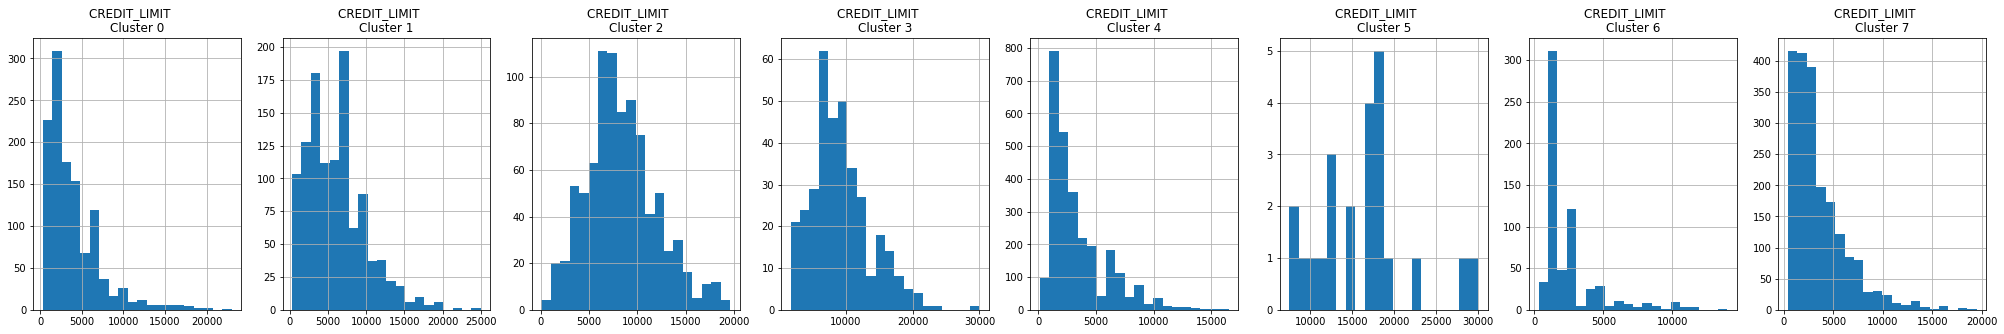

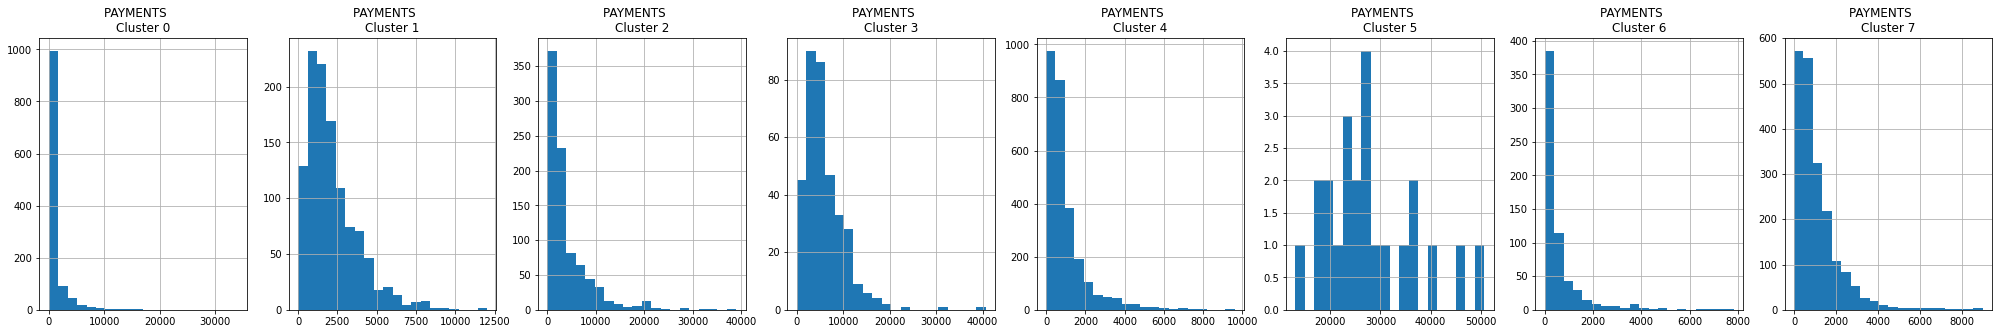

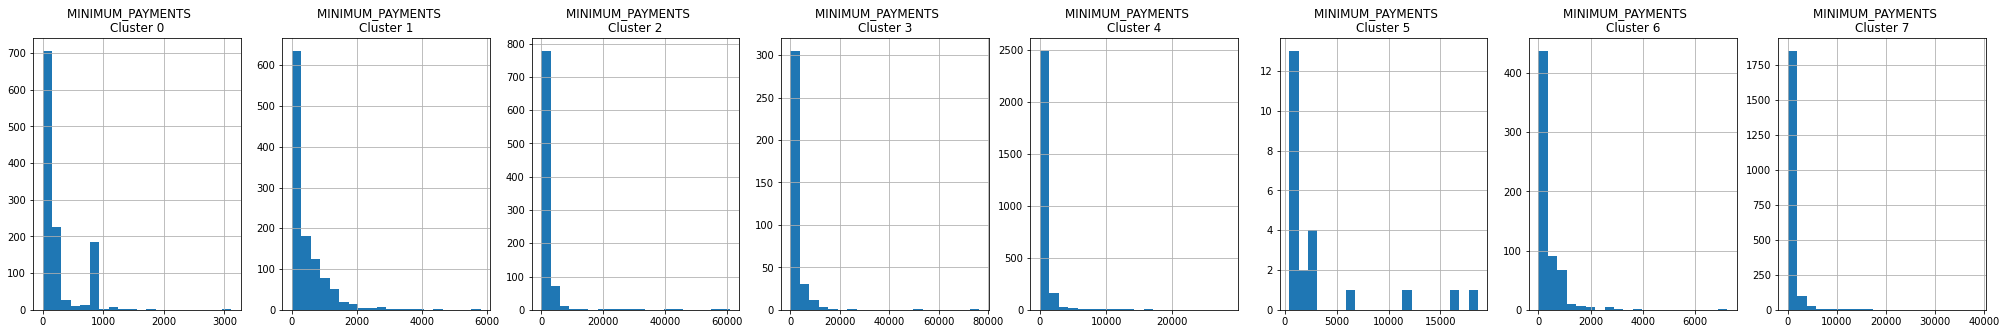

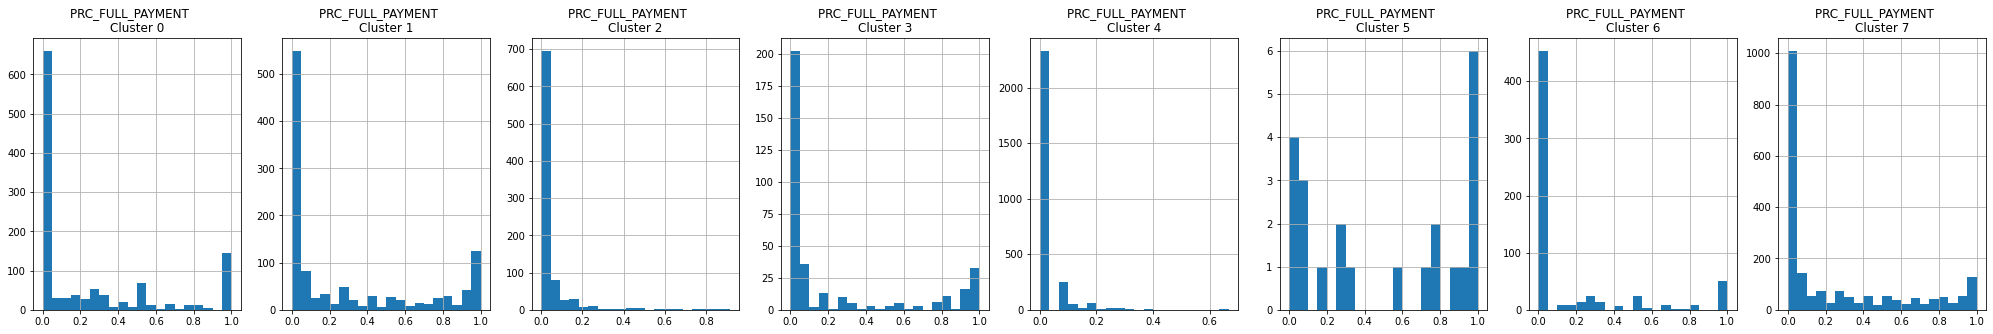

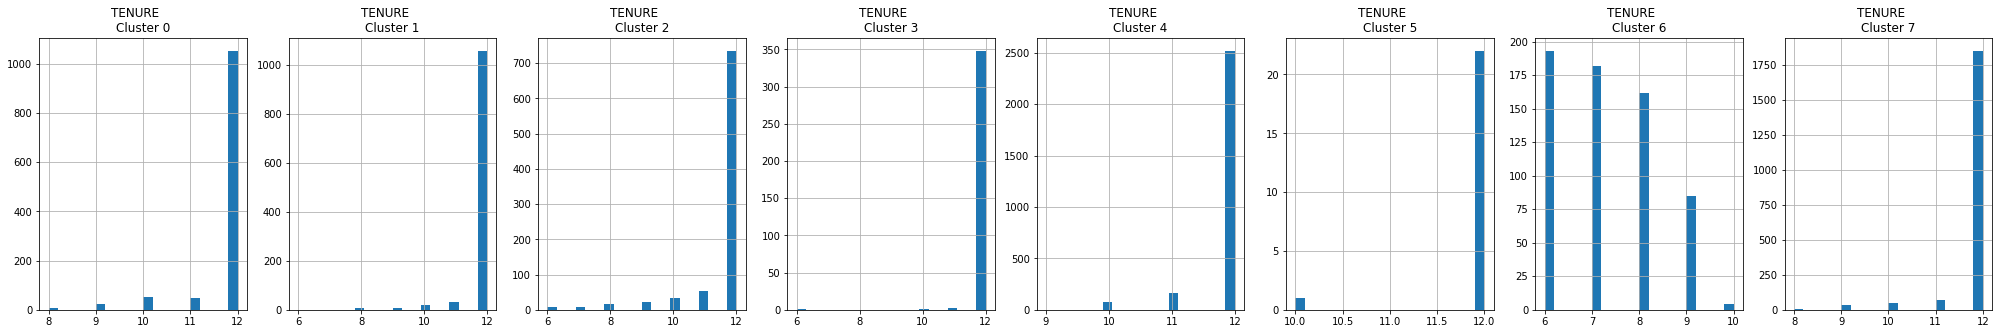

In [48]:
# Visualizamos histogramas para cada cluster 

for i in creditcard_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {}'.format(i, j))
    plt.show()

### Reduccíon de la Dimensionalidad: Análisis de componentes principales (PCA)

In [49]:
# Reducimos y obtenemos las componentes principales
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)

principal_comp

array([[-1.68222012, -1.07644949],
       [-1.13829473,  2.50648459],
       [ 0.96968537, -0.38352173],
       ...,
       [-0.92620354, -1.81078756],
       [-2.33655224, -0.65796863],
       [-0.55642263, -0.40046981]])

In [50]:
# Creamos un dataframe con las dos componentes 
pca_df = pd.DataFrame(data = principal_comp, columns=["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076449
1,-1.138295,2.506485
2,0.969685,-0.383522
3,-0.873628,0.043169
4,-1.599433,-0.688581


In [51]:
# Concatenamos las etiquetas de los clusters con el dataframe de las componentes principales
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076449,4
1,-1.138295,2.506485,2
2,0.969685,-0.383522,1
3,-0.873628,0.043169,4
4,-1.599433,-0.688581,4


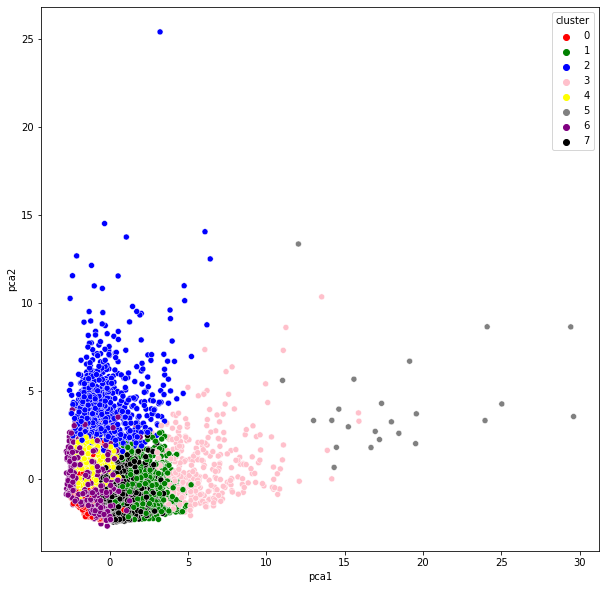

In [52]:
# Visualizacion
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df,
                     palette = ["red", "green", "blue", "pink", "yellow", "gray", "purple", "black"])
plt.show()

### Reduccíon de la Dimensionalidad: Autoencoders

# TAREA #9: APLICAR LOS AUTOENCODERS (REDUCIR LA DIMENSIÓN DE LOS DATOS CON LOS AUTOENCODERS)

In [55]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

# Definimos la reduccion de la dimencion 
encoding_dim = 7


# Modelado del encoder
# Capa de entrada o Input
input_df = Input(shape = (17, ))

# Capas ocultas o Hiddens
x = Dense(encoding_dim, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

# Capa de salida o Output del encoder
encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 


# Modelado del decoder
# Capa de entrada o Input
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded) 

# Capas oculta
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

# Capa de salida o Output del decoder
decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)


# Definimos el modelo completo (comprime y descomprime)
autoencoder = Model(input_df, decoded)

# Definimos el modelo de compresion (solo comprime)
encoder = Model(input_df, encoded)

# Compilacion
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [56]:
# Resumen del modelo
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense_8 (Dense)             (None, 7)                 126       
                                                                 
 dense_9 (Dense)             (None, 500)               4000      
                                                                 
 dense_10 (Dense)            (None, 500)               250500    
                                                                 
 dense_11 (Dense)            (None, 2000)              1002000   
                                                                 
 dense_12 (Dense)            (None, 10)                20010     
                                                                 
 dense_13 (Dense)            (None, 2000)              2200

In [57]:
# Ajuste del modelo
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 5s 53ms/step - loss: 0.5484
Epoch 2/25
70/70 [==============================] - 4s 58ms/step - loss: 0.2902
Epoch 3/25
70/70 [==============================] - 4s 63ms/step - loss: 0.2248
Epoch 4/25
70/70 [==============================] - 5s 70ms/step - loss: 0.1866
Epoch 5/25
70/70 [==============================] - 8s 118ms/step - loss: 0.1694
Epoch 6/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1616
Epoch 7/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1355
Epoch 8/25
70/70 [==============================] - 5s 65ms/step - loss: 0.1204
Epoch 9/25
70/70 [==============================] - 4s 52ms/step - loss: 0.1109
Epoch 10/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1048
Epoch 11/25
70/70 [==============================] - 5s 69ms/step - loss: 0.1034
Epoch 12/25
70/70 [==============================] - 4s 54ms/step - loss: 0.0921
Epoch 13/25
70/70 [=================

In [58]:
# Guardar los pesos
autoencoder.save_weights('autoencoder.h5')

In [60]:
# Prediccion del encoder
pred = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 2s 5ms/step


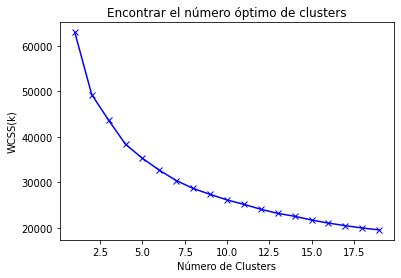

In [61]:
# Aplicar nuevamente el metodo del codo
scores_2 = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)


plt.plot(range_values, scores_2, 'bx-')
plt.title("Encontrar el número óptimo de clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

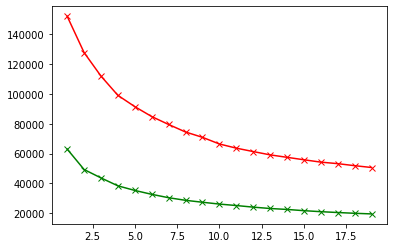

In [63]:
# Comparacion entre los metodos del codo
plt.plot(range_values, scores_1, 'bx-', color = "r")
plt.plot(range_values, scores_2, 'bx-', color = "g")


In [64]:
# Aplicar nuevamente KMeans con 4 clusters
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(pred)

In [65]:
# Creacion del dataSet de los baricentros
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [66]:
# Aplicamos nuevamente PCA
pca = PCA(n_components=2)
princ_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = princ_comp, columns=["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-1.470860,-0.189196
1,0.169490,1.486851
2,-0.329295,-0.297248
3,-1.238418,0.041701
4,-1.350722,-0.102885


In [67]:
# Concatenamos los componentes
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster":labels})], axis = 1)
pca_df

,pca1,pca2,cluster
0,-1.470860,-0.189196,2
1,0.169490,1.486851,0
2,-0.329295,-0.297248,2
3,-1.238418,0.041701,2
4,-1.350722,-0.102885,2
...,...,...,...
8945,0.341706,-1.091947,1
8946,-0.199299,-0.506065,1
8947,-0.136806,-0.752707,1
8948,-0.229090,0.286661,1


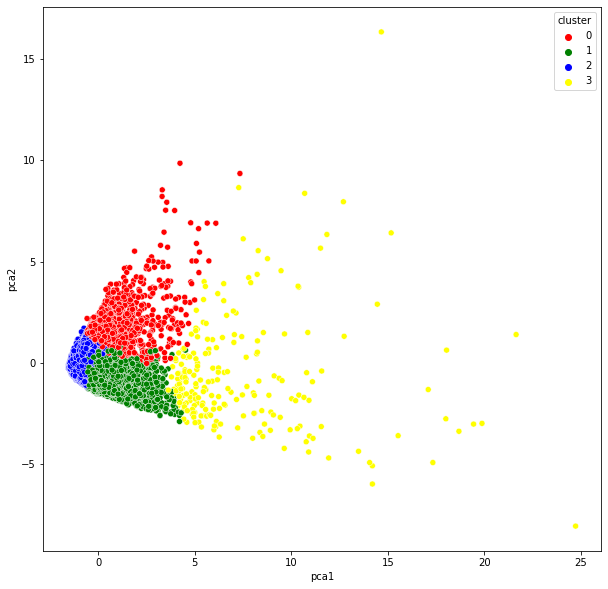

In [68]:
# Visualizacion
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y = "pca2", hue="cluster", data = pca_df, palette=["red", "green", "blue", "yellow"])
plt.show()